**Подключение библиотек и скриптов**

In [1]:
import numpy as np
import pandas as pd
import random

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import KFold, GridSearchCV

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
matplotlib.rcParams.update({'font.size': 14})

In [4]:
def evaluate_preds(train_true_values, train_pred_values, test_true_values, test_pred_values):
    print("Train R2:\t" + str(round(r2(train_true_values, train_pred_values), 3)))
    print("Test R2:\t" + str(round(r2(test_true_values, test_pred_values), 3)))
    
    plt.figure(figsize=(18,10))
    
    plt.subplot(121)
    sns.scatterplot(x=train_pred_values, y=train_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train sample prediction')
    
    plt.subplot(122)
    sns.scatterplot(x=test_pred_values, y=test_true_values)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test sample prediction')

    plt.show()

**Пути к директориям и файлам**

In [5]:
TRAIN_DATASET_PATH = 'train.csv'
TEST_DATASET_PATH = 'test.csv'

### Загрузка данных

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [6]:
train_df = pd.read_csv(TRAIN_DATASET_PATH)
test_df = pd.read_csv(TEST_DATASET_PATH)
train_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
9995,77,32,2.0,50.401785,30.476203,5.0,6,5.0,1968,0.135650,B,B,46,7960,6,350.0,3,11,B,196684.316040
9996,6159,18,1.0,41.521546,20.539216,9.0,13,13.0,2000,0.000000,B,B,30,5562,0,NaN,0,5,A,189050.289571
9997,5123,27,1.0,47.939008,NaN,1.0,12,16.0,2015,0.072158,B,B,2,629,1,NaN,0,0,A,159143.805370
9998,5400,75,2.0,43.602562,33.840147,8.0,1,5.0,1961,0.307467,B,A,30,5048,9,325.0,2,5,B,181595.339808
9999,6306,128,1.0,38.666645,21.157874,8.0,7,17.0,1990,0.000000,B,B,27,4798,0,30.0,2,8,B,218714.077615


In [7]:
test_df = pd.read_csv(TEST_DATASET_PATH)
test_df.tail()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
4995,8180,11,3.0,67.133911,50.809797,6.0,5,9.0,1973,0.000170,B,B,36,5992,0,NaN,1,1,B
4996,4695,1,1.0,40.198472,21.807061,10.0,12,17.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B
4997,5783,12,3.0,77.842178,48.282625,9.0,23,22.0,1989,0.090799,B,B,74,19083,2,NaN,5,15,B
4998,4780,62,2.0,81.305222,NaN,0.0,4,0.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A
4999,12504,30,2.0,60.555693,NaN,1.0,10,17.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B


In [8]:
train_df.shape[1]-1 == test_df.shape[1]

True

### Приведение типов

In [9]:
train_df.dtypes

Id                 int64
DistrictId         int64
Rooms            float64
Square           float64
LifeSquare       float64
KitchenSquare    float64
Floor              int64
HouseFloor       float64
HouseYear          int64
Ecology_1        float64
Ecology_2         object
Ecology_3         object
Social_1           int64
Social_2           int64
Social_3           int64
Healthcare_1     float64
Helthcare_2        int64
Shops_1            int64
Shops_2           object
Price            float64
dtype: object

In [10]:
train_df['Id'] = train_df['Id'].astype(str)
train_df['DistrictId'] = train_df['DistrictId'].astype(str)

### Обзор данных

**Целевая переменная**

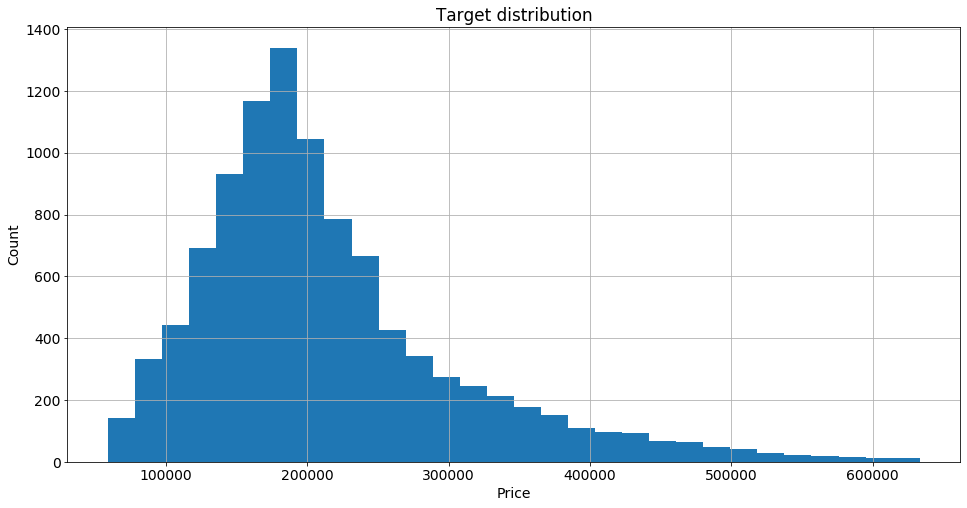

In [11]:
plt.figure(figsize = (16, 8))

train_df['Price'].hist(bins=30)
plt.ylabel('Count')
plt.xlabel('Price')

plt.title('Target distribution')
plt.show()

**Количественные переменные**

In [12]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


**Номинативные переменные**

In [13]:
train_df.select_dtypes(include='object').columns.tolist()

['Id', 'DistrictId', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [14]:
train_df['DistrictId'].value_counts().head()

27    851
1     652
23    565
6     511
9     294
Name: DistrictId, dtype: int64

In [15]:
train_df['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [16]:
train_df['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [17]:
train_df['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

### Обработка выбросов

**Rooms**

In [18]:
train_df['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [19]:
#Видим, что количество комнат, вероятнее, не должно превышать 6
train_df.loc[train_df['Rooms'] > 6, 'Rooms'] = train_df['Rooms'].median()

**Square, LifeSquare, KitchenSquare**

(array([1.200e+01, 1.000e+00, 9.000e+00, 2.300e+01, 3.270e+02, 1.305e+03,
        2.086e+03, 1.208e+03, 1.186e+03, 1.193e+03, 7.090e+02, 5.650e+02,
        6.790e+02, 2.790e+02, 1.070e+02, 1.080e+02, 6.500e+01, 2.600e+01,
        3.700e+01, 2.100e+01, 1.100e+01, 1.400e+01, 2.000e+00, 2.000e+00,
        3.000e+00, 3.000e+00, 7.000e+00, 1.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

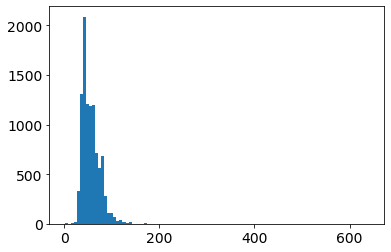

In [20]:
plt.hist(train_df['Square'], bins = 100)

(array([7.59e+03, 2.82e+02, 9.00e+00, 2.00e+00, 0.00e+00, 1.00e+00,
        1.00e+00, 0.00e+00, 1.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00,
        0.00e+00, 0.00e+00, 0.00e+00, 0.00e+00, 

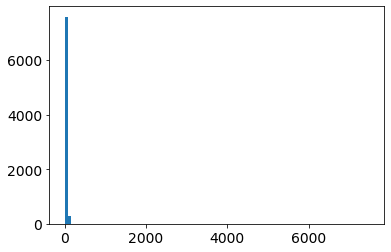

In [21]:
plt.hist(train_df['LifeSquare'], bins = 100)

(array([9.952e+03, 2.100e+01, 1.300e+01, 7.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

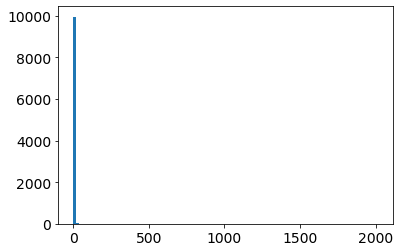

In [22]:
plt.hist(train_df['KitchenSquare'], bins = 100)


In [23]:
train_df = train_df[train_df['Square'].isnull() |
                    (train_df['Square'] < train_df['Square'].quantile(.975)) |
                    (train_df['Square'] > train_df['Square'].quantile(.025))]

train_df = train_df[train_df['LifeSquare'].isnull() |
                    (train_df['LifeSquare'] < train_df['LifeSquare'].quantile(.775)) |
                    (train_df['LifeSquare'] > train_df['LifeSquare'].quantile(.025))]

train_df = train_df[train_df['KitchenSquare'].isnull() |
                    (train_df['KitchenSquare'] < train_df['KitchenSquare'].quantile(.975))]

train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3

In [24]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9744.000000,9744.000000,7642.000000,9744.000000,9744.000000,9744.000000,9.744000e+03,9744.000000,9744.000000,9744.000000,9744.000000,5071.000000,9744.000000,9744.000000,9744.000000
mean,1.880542,55.627392,36.768198,6.196326,8.509134,12.517755,4.042403e+03,0.119397,24.771860,5366.247947,8.072147,1138.791165,1.322557,4.254721,212353.727025
std,0.808387,20.168710,87.415571,2.774598,5.215673,6.682542,2.031170e+05,0.119395,17.543213,4011.273593,23.937708,1020.967412,1.487890,4.820964,90384.883009
min,0.000000,1.136859,0.370619,3.000000,1.000000,0.000000,1.914000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.628939,22.698661,3.000000,4.000000,9.000000,1.973000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153781.674885
50%,2.000000,52.014030,32.525279,6.000000,7.000000,12.000000,1.977000e+03,0.075779,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,191638.626648
75%,2.000000,65.438927,44.766473,8.000000,12.000000,17.000000,1.999000e+03,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.000000,6.000000,247066.450374
max,6.000000,641.065193,7480.592129,12.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [25]:

#Видим, что общая площадь, вероятнее, не должна превышать примерно 150 (если судить по графику распределения выборки до обработки),
#т.к. даже у депутатов нет квартир с такими площадями
#Обработаем эти выбросы
train_df.loc[train_df['Square'] > 150, 'Square'] = train_df['Square'].median()
train_df.loc[train_df['LifeSquare'] > 150, 'LifeSquare'] = train_df['LifeSquare'].median()


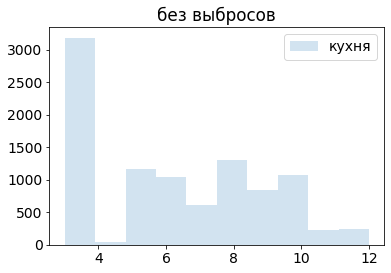

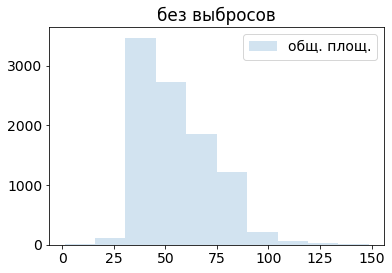

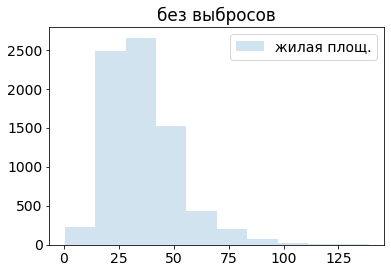

In [26]:
plt.hist(train_df['KitchenSquare'], bins = 10, alpha = 0.2, label ='кухня');
plt.legend()
plt.title('без выбросов')
plt.show()
plt.hist(train_df['Square'], bins = 10, alpha = 0.2, label ='общ. площ.');
plt.legend()
plt.title('без выбросов')
plt.show()
plt.hist(train_df['LifeSquare'], bins = 10, alpha = 0.2, label ='жилая площ.');
plt.legend()
plt.title('без выбросов')
plt.show()

In [27]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,9744.000000,9744.000000,7642.000000,9744.000000,9744.000000,9744.000000,9.744000e+03,9744.000000,9744.000000,9744.000000,9744.000000,5071.000000,9744.000000,9744.000000,9744.000000
mean,1.880542,55.313592,35.452957,6.196326,8.509134,12.517755,4.042403e+03,0.119397,24.771860,5366.247947,8.072147,1138.791165,1.322557,4.254721,212353.727025
std,0.808387,17.589178,16.602425,2.774598,5.215673,6.682542,2.031170e+05,0.119395,17.543213,4011.273593,23.937708,1020.967412,1.487890,4.820964,90384.883009
min,0.000000,1.136859,0.370619,3.000000,1.000000,0.000000,1.914000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.628939,22.698661,3.000000,4.000000,9.000000,1.973000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153781.674885
50%,2.000000,52.012272,32.525246,6.000000,7.000000,12.000000,1.977000e+03,0.075779,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,191638.626648
75%,2.000000,65.341365,44.659489,8.000000,12.000000,17.000000,1.999000e+03,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.000000,6.000000,247066.450374
max,6.000000,148.671938,138.910187,12.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


**HouseFloor, Floor**

In [28]:
train_df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  32.,  37.,
        38.,  39.,  40.,  44.,  45.,  48.,  99., 117.])

In [29]:
train_df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 37, 42],
      dtype=int64)

In [30]:
#Убираем нулевые этажи
train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = train_df['HouseFloor'].median()

In [31]:
#Решаем неточность выборки, где этаж квартиры превышал этажность дома
floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index

train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))

**HouseYear**

In [32]:
train_df['HouseYear'].sort_values(ascending=False)

1497    20052011
4189        4968
2877        2020
3485        2020
707         2020
3859        2020
5701        2020
1499        2020
9674        2020
3357        2020
2493        2020
585         2020
4493        2020
4376        2020
7459        2020
790         2020
4053        2020
7076        2020
6895        2019
6128        2019
1849        2019
8193        2019
6184        2019
5351        2019
2975        2019
4037        2019
6489        2019
2904        2019
1810        2019
1769        2019
          ...   
8685        1933
9370        1933
8163        1933
6846        1933
9506        1933
6208        1932
1029        1932
6277        1931
5667        1931
8207        1931
8055        1931
7163        1931
2588        1931
3443        1931
4949        1930
6630        1930
8381        1930
8951        1929
3933        1929
9825        1928
2608        1919
4904        1919
7562        1919
2554        1918
5016        1918
8505        1918
8144        1917
1380        19

In [33]:
#Убираем дома из "будущего"
train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2019

### Обработка пропусков

In [34]:
len(train_df) - train_df.count()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2102
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4673
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

**Healthcare_1**

In [35]:
train_df[['Healthcare_1','Helthcare_2']]

,Healthcare_1,Helthcare_2
0,NaN,0
1,240.0,1
2,229.0,1
3,1084.0,0
4,2078.0,2
5,990.0,0
6,NaN,1
7,NaN,0
8,NaN,0
9,NaN,0


In [36]:
#Убираем колонку 
train_df.drop(['Healthcare_1'], axis = 1, inplace = True)


In [37]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,9744.000000,9744.000000,7642.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000
mean,1.880542,55.313592,35.452957,6.196326,7.363506,12.847804,1984.424877,0.119397,24.771860,5366.247947,8.072147,1.322557,4.254721,212353.727025
std,0.808387,17.589178,16.602425,2.774598,4.993134,6.343864,18.106772,0.119395,17.543213,4011.273593,23.937708,1.487890,4.820964,90384.883009
min,0.000000,1.136859,0.370619,3.000000,1.000000,1.000000,1914.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.628939,22.698661,3.000000,3.000000,9.000000,1973.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153781.674885
50%,2.000000,52.012272,32.525246,6.000000,6.000000,12.000000,1977.000000,0.075779,25.000000,5285.000000,2.000000,1.000000,3.000000,191638.626648
75%,2.000000,65.341365,44.659489,8.000000,10.000000,17.000000,1999.000000,0.195781,36.000000,7287.000000,5.000000,2.000000,6.000000,247066.450374
max,6.000000,148.671938,138.910187,12.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


In [38]:
#заполним пропущенные LifeSquare
train_df['LifeSquare'].fillna(train_df['LifeSquare'].median(), inplace = True)

In [39]:
train_df.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price
count,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000,9744.000000
mean,1.880542,55.313592,34.821384,6.196326,7.363506,12.847804,1984.424877,0.119397,24.771860,5366.247947,8.072147,1.322557,4.254721,212353.727025
std,0.808387,17.589178,14.752047,2.774598,4.993134,6.343864,18.106772,0.119395,17.543213,4011.273593,23.937708,1.487890,4.820964,90384.883009
min,0.000000,1.136859,0.370619,3.000000,1.000000,1.000000,1914.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028
25%,1.000000,41.628939,25.355889,3.000000,3.000000,9.000000,1973.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153781.674885
50%,2.000000,52.012272,32.525246,6.000000,6.000000,12.000000,1977.000000,0.075779,25.000000,5285.000000,2.000000,1.000000,3.000000,191638.626648
75%,2.000000,65.341365,40.785923,8.000000,10.000000,17.000000,1999.000000,0.195781,36.000000,7287.000000,5.000000,2.000000,6.000000,247066.450374
max,6.000000,148.671938,138.910187,12.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570


**LifeSquare**

In [40]:
train_df['Square'].median()

52.012272145664525

In [41]:
train_df.loc[train_df['Square']<(train_df['LifeSquare']+train_df['KitchenSquare'])].head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,0,5,B,175616.227217
14,10953,27,1.0,53.769097,52.408027,3.0,2,4.0,1977,0.072158,B,B,2,629,1,0,0,A,140647.565937
28,8054,23,1.0,42.530043,43.967759,3.0,3,9.0,2014,0.034656,B,B,0,168,0,0,0,B,95338.198549
42,9833,1,2.0,56.494318,54.723569,3.0,9,17.0,1977,0.007122,B,B,1,264,0,0,1,B,196078.907289
44,10521,38,3.0,104.211396,106.340403,3.0,5,12.0,2017,0.060753,B,B,15,2787,2,0,7,B,435462.048070


In [42]:
sq_diff=(train_df.loc[train_df['Square']>(train_df['LifeSquare']+train_df['KitchenSquare']), 'Square']  - train_df.loc[train_df['LifeSquare'].notnull(), 'LifeSquare'] - train_df.loc[train_df['LifeSquare'].notnull(), 'KitchenSquare']).median() - 2
sq_diff

10.8637495990867

In [43]:
train_df.loc[train_df['Square']<(train_df['LifeSquare']+train_df['KitchenSquare']), 'Square'] =\
train_df.loc[train_df['Square']<(train_df['LifeSquare']+train_df['KitchenSquare']), 'LifeSquare'] +\
train_df.loc[train_df['Square']<(train_df['LifeSquare']+train_df['KitchenSquare']), 'KitchenSquare'] +\
sq_diff

### Построение новых признаков

**Dummies**

In [44]:
train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A':0, 'B':1})
train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace({'A':0, 'B':1})
train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A':0, 'B':1})

**DistrictSize, IsDistrictLarge**

In [45]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,33,7976,5,0,11,B,184966.930730,1,1,1
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,46,10309,1,1,16,B,300009.450063,1,1,1
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,34,7759,0,1,3,B,220925.908524,1,1,1
3,5809,58,2.0,72.595262,52.731512,9.0,8,17.0,1977,0.437885,...,23,5735,3,0,5,B,175616.227217,1,1,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,35,5776,1,2,4,B,150226.531644,1,1,1


In [46]:
train_df['DistrictId'].unique()

array(['35', '41', '53', '58', '99', '59', '154', '74', '1', '23', '28',
       '31', '13', '57', '27', '85', '34', '19', '0', '48', '54', '150',
       '11', '50', '61', '44', '90', '200', '43', '177', '101', '38',
       '21', '103', '98', '170', '94', '5', '88', '47', '6', '52', '62',
       '77', '79', '9', '156', '69', '108', '96', '169', '18', '148',
       '128', '10', '144', '120', '39', '7', '84', '123', '159', '70',
       '129', '3', '95', '78', '45', '121', '49', '25', '2', '127', '56',
       '109', '46', '17', '119', '80', '86', '83', '91', '92', '118',
       '187', '36', '106', '161', '22', '63', '167', '113', '66', '29',
       '37', '20', '8', '181', '40', '93', '30', '81', '107', '130',
       '100', '12', '125', '67', '26', '89', '24', '111', '138', '64',
       '124', '183', '55', '157', '151', '15', '33', '87', '126', '155',
       '164', '105', '110', '132', '71', '73', '189', '75', '122', '163',
       '141', '76', '115', '139', '143', '201', '165', '190', '193'

In [47]:
train_df['DistrictId'].value_counts()

27     810
1      646
23     546
6      503
9      292
62     231
30     225
58     174
53     170
21     163
52     141
8      141
11     127
61     118
46     118
45     114
57     107
34     107
74     107
44     103
47      97
99      97
13      96
101     94
29      89
7       88
94      88
48      87
41      86
3       80
      ... 
188      5
192      5
194      5
166      5
191      5
184      5
133      5
182      4
50       4
112      4
179      4
136      4
175      3
201      3
180      3
181      3
193      3
185      3
208      2
158      2
202      2
172      2
186      2
195      2
209      1
205      1
117      1
174      1
196      1
207      1
Name: DistrictId, Length: 204, dtype: int64

In [48]:
#Добавляем размер района
district_size = train_df['DistrictId'].value_counts().reset_index()\
                .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

district_size.head()

,DistrictId,DistrictSize
0,27,810
1,1,646
2,23,546
3,6,503
4,9,292


In [49]:
#Соединяем с основной таблицей
train_df = train_df.merge(district_size, on='DistrictId', how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,7976,5,0,11,B,184966.930730,1,1,1,22
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,10309,1,1,16,B,300009.450063,1,1,1,86
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,7759,0,1,3,B,220925.908524,1,1,1,170
3,5809,58,2.0,72.595262,52.731512,9.0,8,17.0,1977,0.437885,...,5735,3,0,5,B,175616.227217,1,1,1,174
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,5776,1,2,4,B,150226.531644,1,1,1,97


In [50]:
#Смотрим на количество больших и маленьких районов
(train_df['DistrictSize'] > 100).value_counts()

True     4943
False    4801
Name: DistrictSize, dtype: int64

In [51]:
#Добавляем признак
train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)

In [52]:
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Social_3,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,5,0,11,B,184966.930730,1,1,1,22,0
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,1,16,B,300009.450063,1,1,1,86,0
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,0,1,3,B,220925.908524,1,1,1,170,1
3,5809,58,2.0,72.595262,52.731512,9.0,8,17.0,1977,0.437885,...,3,0,5,B,175616.227217,1,1,1,174,1
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,1,2,4,B,150226.531644,1,1,1,97,0


**MedPriceByDistrict (Средняя цена по району)**

In [53]:
med_price_by_district = train_df.groupby(['DistrictId', 'Rooms'], as_index=False).agg({'Price':'median'})\
                        .rename(columns={'Price':'MedPriceByDistrict'})

med_price_by_district.head()

,DistrictId,Rooms,MedPriceByDistrict
0,0,1.0,142486.170594
1,0,2.0,176210.812334
2,0,3.0,308098.189977
3,1,1.0,147110.201250
4,1,2.0,202626.530012


In [54]:
train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
train_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Helthcare_2,Shops_1,Shops_2,Price,Ecology_2_bin,Ecology_3_bin,Shops_2_bin,DistrictSize,IsDistrictLarge,MedPriceByDistrict
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,...,0,11,B,184966.930730,1,1,1,22,0,207786.135836
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,...,1,16,B,300009.450063,1,1,1,86,0,297041.145784
2,4765,53,2.0,44.947953,29.197612,3.0,8,12.0,1968,0.049637,...,1,3,B,220925.908524,1,1,1,170,1,261705.465881
3,5809,58,2.0,72.595262,52.731512,9.0,8,17.0,1977,0.437885,...,0,5,B,175616.227217,1,1,1,174,1,166809.665642
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,...,2,4,B,150226.531644,1,1,1,97,0,158539.052715


### Отбор признаков

In [55]:
train_df.columns.tolist()

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price',
 'Ecology_2_bin',
 'Ecology_3_bin',
 'Shops_2_bin',
 'DistrictSize',
 'IsDistrictLarge',
 'MedPriceByDistrict']

In [56]:
feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2_bin']

new_feature_names = ['IsDistrictLarge', 'MedPriceByDistrict']

target_name = 'Price'

### Разбиение на train и test

In [57]:
X = train_df[feature_names + new_feature_names]
y = train_df[target_name]

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=21)

### Построение модели

**Обучение и оценка модели**

In [59]:
rf_model = RandomForestRegressor(random_state=21, max_depth = 14, max_features = 5, n_estimators = 200)
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
                      max_features=5, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=21, verbose=0,
                      warm_start=False)

**Отложенная выборка**

Train R2:	0.937
Test R2:	0.751


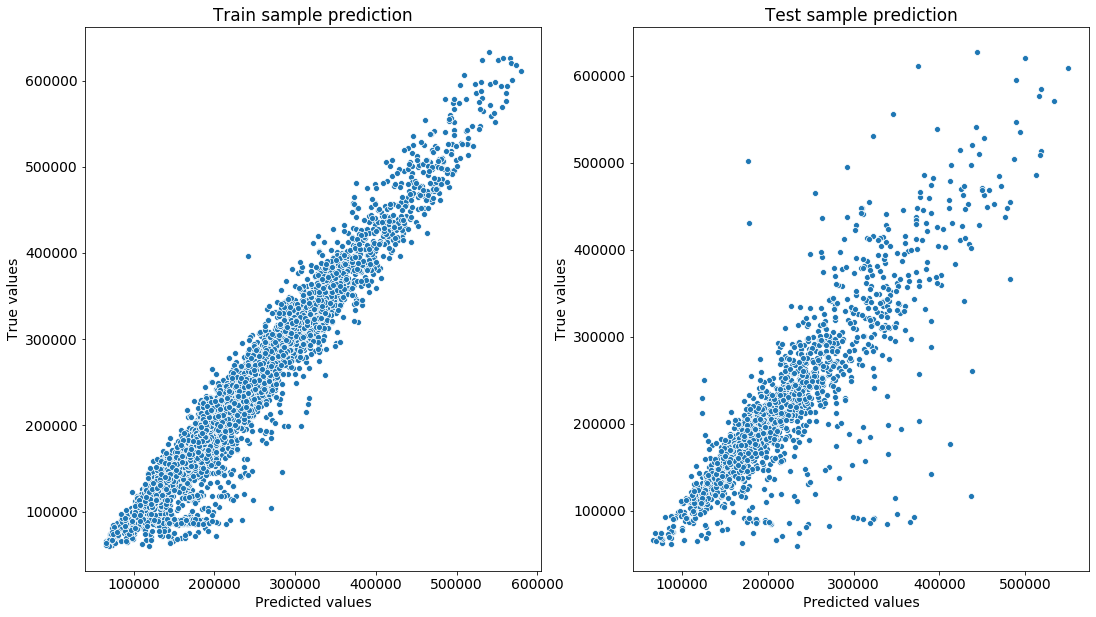

In [60]:
y_train_preds = rf_model.predict(X_train)
y_test_preds = rf_model.predict(X_test)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

**Перекрёстная проверка**

In [61]:
cv_score = cross_val_score(rf_model, X, y, scoring='r2', cv=KFold(n_splits=3, shuffle=True, random_state=21))
cv_score

array([0.74367533, 0.75957113, 0.76454811])

In [62]:
cv_score.mean()

0.7559315232083037

**Важность признаков**

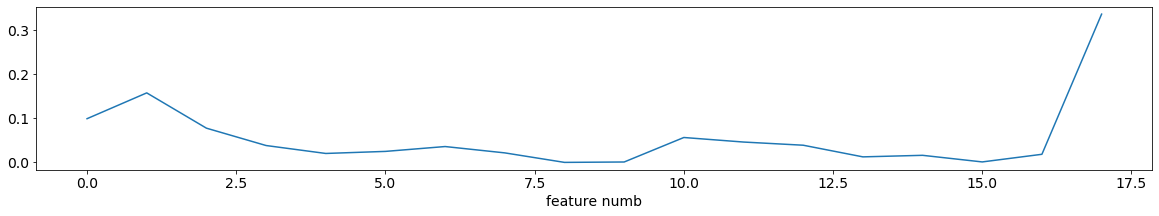

In [63]:
plt.figure(figsize=(20,3))
plt.plot( rf_model.feature_importances_)
plt.xlabel('feature numb')

plt.show()

### Прогнозирование на тестовом датасете

1. Выполнить для тестового датасета те же этапы обработки и построения признаков
2. Не потерять и не перемешать индексы от примеров при построении прогнозов
3. Прогнозы должны быть для всех примеров из тестового датасета (для всех строк)

In [64]:
def my_feature(train_df = train_df, train_test = 0, 
               split_par = 0.2, kitch_size = 3,room_median = 2, 
               HouseFloor = 12, sq_diff = 10, 
               district_size = district_size,med_price_by_district = med_price_by_district):
    
    train_df['Id'] = train_df['Id'].astype(str)
    train_df['DistrictId'] = train_df['DistrictId'].astype(str)
    train_df.loc[train_df['Rooms'] > 6, 'Rooms'] = room_median
    
    train_df.loc[train_df['KitchenSquare'] < 3, 'KitchenSquare'] = 3
    
    train_df.loc[train_df['Square'] > 150, 'Square'] = train_df['Square'].median()
    train_df.loc[train_df['LifeSquare'] > 150, 'LifeSquare'] = train_df['LifeSquare'].median()
    
    train_df.loc[train_df['HouseFloor'] == 0, 'HouseFloor'] = HouseFloor
    
    floor_outliers = train_df.loc[train_df['Floor'] > train_df['HouseFloor']].index

    train_df.loc[floor_outliers, 'Floor'] = train_df.loc[floor_outliers, 'HouseFloor'].apply(lambda x: random.randint(1, x))
    
    train_df.loc[train_df['HouseYear'] > 2020, 'HouseYear'] = 2019
    
    train_df.drop(['Healthcare_1'], axis = 1, inplace = True)
    
    train_df.loc[train_df['Square']<(train_df['LifeSquare']+train_df['KitchenSquare']), 'Square'] =\
    train_df.loc[train_df['Square']<(train_df['LifeSquare']+train_df['KitchenSquare']), 'LifeSquare'] +\
    train_df.loc[train_df['Square']<(train_df['LifeSquare']+train_df['KitchenSquare']), 'KitchenSquare'] +\
    sq_diff
    
    train_df.loc[train_df['Square'] > 150, 'Square'] = train_df['Square'].median()
    train_df.loc[train_df['LifeSquare'] > 150, 'LifeSquare'] = train_df['LifeSquare'].median()
    train_df.loc[train_df['KitchenSquare'] > 12, 'KitchenSquare'] = train_df['KitchenSquare'].median()
    
    train_df['LifeSquare'].fillna(train_df['LifeSquare'].median(), inplace = True)
    
    train_df['Ecology_2_bin'] = train_df['Ecology_2'].replace({'A':0, 'B':1})
    train_df['Ecology_3_bin'] = train_df['Ecology_3'].replace({'A':0, 'B':1})
    train_df['Shops_2_bin'] = train_df['Shops_2'].replace({'A':0, 'B':1})
    
    train_df = train_df.merge(district_size, on='DistrictId', how='left')
    
    train_df['IsDistrictLarge'] = (train_df['DistrictSize'] > 100).astype(int)
    train_df = train_df.merge(med_price_by_district, on=['DistrictId', 'Rooms'], how='left')
    feature_names = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor', 'HouseFloor', 'HouseYear',
                 'Ecology_1', 'Ecology_2_bin', 'Ecology_3_bin', 'Social_1', 'Social_2', 'Social_3',
                 'Helthcare_2', 'Shops_1', 'Shops_2_bin']

    new_feature_names = ['IsDistrictLarge', 'MedPriceByDistrict']
    train_df['MedPriceByDistrict'].fillna(train_df['MedPriceByDistrict'].median(), inplace = True)

    target_name = 'Price'
    X = train_df[feature_names + new_feature_names]
    X_train,y_train = [],[]
    X_test,y_test = X,[]
    if train_test==1: 
        y = train_df[target_name]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_par, shuffle=True, random_state=21)
    
    
    return X_train,y_train,X_test,y_test

sq_diff
room_median = train_df['Rooms'].median()
HouseFloor_med = train_df['HouseFloor'].median()
test_df = pd.read_csv(TEST_DATASET_PATH)


_,_,Test_x,_ = my_feature(test_df, train_test = 0, 
                           split_par = 0.2, kitch_size = 3,room_median = 2, 
                           HouseFloor = 12, sq_diff = 10, 
                           district_size = district_size,
                           med_price_by_district = med_price_by_district)



In [65]:
Test_x.describe()

,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2_bin,Ecology_3_bin,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2_bin,IsDistrictLarge,MedPriceByDistrict
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.907000,58.034441,35.404125,6.20840,7.507200,12.915400,1984.392600,0.119874,0.990400,0.970200,24.933800,5406.900000,8.262600,1.31940,4.242800,0.917600,0.489800,210160.781781
std,0.810976,19.403354,15.341338,2.72706,5.159348,6.468617,18.573149,0.120070,0.097518,0.170052,17.532202,4026.614773,23.863762,1.47994,4.777365,0.275001,0.499946,71855.626576
min,0.000000,5.647458,0.333490,3.00000,1.000000,1.000000,1908.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.00000,0.000000,0.000000,0.000000,84250.557673
25%,1.000000,42.732406,25.850152,3.00000,4.000000,9.000000,1973.000000,0.019509,1.000000,1.000000,6.000000,1564.000000,0.000000,0.00000,1.000000,1.000000,0.000000,165700.355193
50%,2.000000,54.675519,32.925087,6.00000,6.000000,12.000000,1977.000000,0.072158,1.000000,1.000000,25.000000,5285.000000,2.000000,1.00000,3.000000,1.000000,0.000000,195474.299127
75%,2.000000,68.648095,41.756711,8.00000,10.000000,17.000000,2000.000000,0.195781,1.000000,1.000000,36.000000,7287.000000,5.000000,2.00000,6.000000,1.000000,1.000000,239394.413136
max,6.000000,149.921090,136.921090,12.00000,46.000000,99.000000,2020.000000,0.521867,1.000000,1.000000,74.000000,19083.000000,141.000000,6.00000,23.000000,1.000000,1.000000,593618.746096


In [66]:
y_pred_test = rf_model.predict(Test_x)

In [67]:
test_df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Ecology_2_bin,Ecology_3_bin,Shops_2_bin
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,...,B,11,2748,1,0,0,B,1,1,1
1,15856,74,2.0,69.263183,32.925087,3.0,1,1.0,1977,0.075779,...,B,6,1437,3,0,2,B,1,1,1
2,5480,190,1.0,37.948246,15.948246,12.0,2,5.0,1909,0.000000,...,B,30,7538,87,5,5,B,1,1,1
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,...,B,23,4583,3,3,3,B,1,1,1
4,14275,27,1.0,47.527111,43.387569,3.0,17,17.0,2017,0.072158,...,B,2,629,1,0,0,A,1,1,0


In [68]:
final_df = pd.DataFrame({'Id':test_df['Id'],
                         'price':y_pred_test}, columns = ['Id', 'price'])

In [69]:
final_df.head()

,Id,price
0,725,158808.789726
1,15856,226065.458908
2,5480,225591.520864
3,15664,303853.703208
4,14275,134743.008138


In [70]:
final_df.to_csv('INizamov_predictions.csv', sep = ',', index = False)